# MNIST 손글씨 - Convolutional Neural Network - Ver3

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


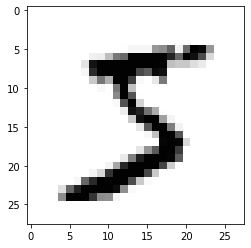

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# 0~1 사이의 값으로 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
Y_class_train[0]

5

In [8]:
# Y값을 원핫인코딩으로 변환
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 모델 정의, 설정, 학습

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# Conv2D, MaxPooling2D는 2차원 데이터이기 때문에 Flatten 을 이용하여 1차원 데이터(Dense)로 변환시킨다.
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + 'best{epoch:03d}-{val_loss:.4f}.hdf5'

In [13]:
# 모델 최적화 설정
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(
    filepath=modelpath, 
    monitor='val_loss',
    verbose=1, 
    save_best_only=True
)
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10
)

In [14]:
# 모델 실행
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=30, 
    batch_size=200,
    verbose=0,
    callbacks=[checkpointer, early_stopping]
)


Epoch 00001: val_loss improved from inf to 0.05990, saving model to ./model/best001-0.0599.hdf5

Epoch 00002: val_loss improved from 0.05990 to 0.04812, saving model to ./model/best002-0.0481.hdf5

Epoch 00003: val_loss improved from 0.04812 to 0.03976, saving model to ./model/best003-0.0398.hdf5

Epoch 00004: val_loss did not improve from 0.03976

Epoch 00005: val_loss did not improve from 0.03976

Epoch 00006: val_loss did not improve from 0.03976

Epoch 00007: val_loss did not improve from 0.03976

Epoch 00008: val_loss improved from 0.03976 to 0.03943, saving model to ./model/best008-0.0394.hdf5

Epoch 00009: val_loss did not improve from 0.03943

Epoch 00010: val_loss did not improve from 0.03943

Epoch 00011: val_loss did not improve from 0.03943

Epoch 00012: val_loss did not improve from 0.03943

Epoch 00013: val_loss did not improve from 0.03943

Epoch 00014: val_loss did not improve from 0.03943

Epoch 00015: val_loss did not improve from 0.03943

Epoch 00016: val_loss did n

In [15]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best008-0.0394.hdf5')

In [16]:
# 테스트 정확도 출력
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print('\n Test Accuracy: %.4f' % acc)

313/313 - 1s - loss: 0.0499 - accuracy: 0.9899

 Test Accuracy: 0.9899


## 훈련 과정 시각화

In [17]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

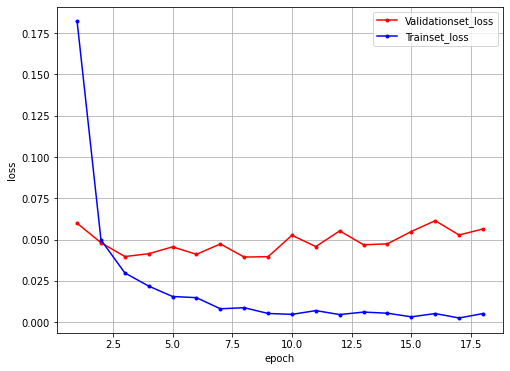

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()